Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/Datasets/EDA/auto-mpg.csv')
dataset.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
dataset.describe(include='O')

,horsepower,car name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


In [ ]:
#Updating the horsepower feature to int and filling all nulls with 0
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'], errors='coerce').fillna(0).astype(int)


In [ ]:
dataset.describe(include='O')

,car name
count,398
unique,305
top,ford pinto
freq,6


In [ ]:
#Creating a labelEncoder for Car name to encode Car names with a value between 0 and n_classes-1. In our case n_classes for Car name is 305
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en= dataset.iloc[:, 8].values
X_en = labelencoder.fit_transform(X_en)

In [ ]:
X_en

array([ 49,  36, 231,  14, 161, 141,  54, 223, 241,   1, 101, 215,  57,
        30, 274, 220,   8, 150,  95, 282, 211,  16, 258,  22,   7, 133,
        68, 112, 163,  95,  65, 271, 156,   7, 232,  49, 162,  10,  54,
       242, 141, 223, 116, 129, 250,   9,  64, 243, 151, 187, 208, 210,
       123, 267,  76, 286, 218, 272, 105, 293,  63, 158,  54, 241, 223,
       141,   2, 192,  31, 203,  75, 183,  11,  48, 143, 233, 295, 283,
       212, 253, 157,  85, 279, 104, 268,  25,  10,  55, 142, 109, 193,
        44, 148, 222,  74,  29,   0, 235,  62,   8, 150, 220, 292,  54,
       128, 219, 207,   7, 263,  63,  87, 174, 156, 188, 121,  59, 244,
       124, 209,  17, 294, 113, 260, 276, 204, 220, 150,   8,  61,  92,
       156, 267,  63,  50,  10, 234, 142,  27, 110, 143,  11,  21, 284,
       209, 271,  88, 103, 124, 122, 167, 261, 127, 236,  61, 194, 150,
       241,  42, 224, 148,  24,  41,  10, 221,  34,  60, 154, 266, 156,
         7, 240, 271, 284,  88, 156, 287,  12,  17, 211, 296, 26

In [ ]:
#Creating the input features X and target variable y
X= dataset.iloc[:,1:7]
X['Car'] = X_en
y= dataset.iloc[:,0].values

In [ ]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,Car
0,8,307.0,130,3504,12.0,70,49
1,8,350.0,165,3693,11.5,70,36
2,8,318.0,150,3436,11.0,70,231
3,8,304.0,150,3433,12.0,70,14
4,8,302.0,140,3449,10.5,70,161
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,153
394,4,97.0,52,2130,24.6,82,301
395,4,135.0,84,2295,11.6,82,119
396,4,120.0,79,2625,18.6,82,159


In [ ]:
#create a full dataset including X and Y 
full_data= X.copy()
full_data['mpg']= y
full_data.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model year,Car,mpg
0,8,307.0,130,3504,12.0,70,49,18.0
1,8,350.0,165,3693,11.5,70,36,15.0


In [ ]:
#Applying step 1 of the filter method
#Identify input features having high correlation with target variable.
#correlation of each of the input feature with the target variable
importances = full_data.drop('mpg', axis=1).apply(lambda x: x.corr(full_data.mpg))
indices = np.argsort(importances)
print(importances[indices])

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
horsepower     -0.754276
Car             0.273936
acceleration    0.420289
model year      0.579267
dtype: float64


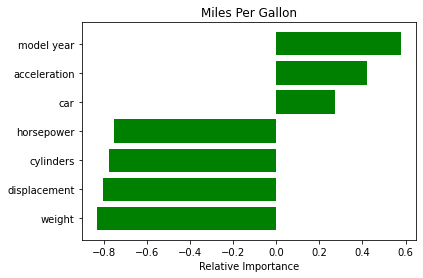

In [ ]:
names=['cylinders','displacement','horsepower','weight','acceleration','model year', 'car']
plt.title('Miles Per Gallon')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#We set the threshold to the absolute value of 0.4. We keep input features only if the correlation of the input feature with the target variable is greater than 0.4
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.4:
        print(names[i])

cylinders
displacement
horsepower
weight
acceleration
model year


In [ ]:
X= dataset[ ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]
#We now have reduced the input features from 7 to 6. Car name was dropped as it was not having a high correlation with mpg(miles per gallon)

#Applying step 2 of the filter method


In [ ]:
#Identify input features that have a low correlation with other independent variables.
X.corr()


,cylinders,displacement,horsepower,weight,acceleration,model year
cylinders,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746
displacement,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164
horsepower,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587
weight,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564
acceleration,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137
model year,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000


In [ ]:
#we can oberve 

In [ ]:
X= dataset[ ['cylinders', 'acceleration', 'model year']]   

#Applying step 3 of the filter method

In [ ]:
#Find the information gain or mutual information of the independent variable with respect to a target variable
mi = mutual_info_regression(X, y)

In [ ]:
mi

cylinders       0.619898
acceleration    0.178432
model year      0.350683
dtype: float64

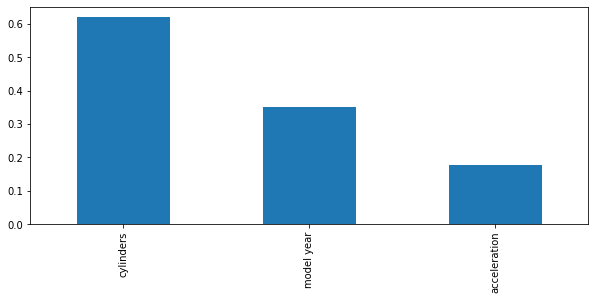

In [ ]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

In [ ]:
#We now have our feature importance to predict the miles per gallon. Miles per gallon can be predicted based on the number of cylinders in the car, the year car was manufactured ad the acceleration.

#Wraper methods!

In [ ]:
#Wrapper Methods in Python

In [ ]:
#There are two popular libraries in Python which can be used to perform wrapper style feature selection — Sequential Feature Selector from mlxtend and Recursive Feature Elimination from Scikit-learn.

##Forward Selection — SFS() from mlxtend

In [ ]:
#Load needed libraries
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# load_boston() sklearn dataset to boston
boston = load_boston()

# use np.c_ to concatenate into a dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names) 
df['PRICE'] = pd.Series(boston.target)

#Split the features and target data
#select the first 13 columns as features
X = df.iloc[:,:13]
#Select the last column for target 
y = df.iloc[:,-1]

#Define Sequential Forward Selection (sfs)       
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, y)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)",[0.5441462975864797],0.544146,"(LSTAT,)"
2,"(5, 12)",[0.6385616062603403],0.638562,"(RM, LSTAT)"
3,"(5, 10, 12)",[0.6786241601613112],0.678624,"(RM, PTRATIO, LSTAT)"
4,"(5, 7, 10, 12)",[0.6903077016842538],0.690308,"(RM, DIS, PTRATIO, LSTAT)"
5,"(4, 5, 7, 10, 12)",[0.7080892893529662],0.708089,"(NOX, RM, DIS, PTRATIO, LSTAT)"


#2. Backward elimination — RFE() from Sklearn

In [ ]:
#Load needed libraries
from sklearn.datasets import load_boston
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# load_boston() sklearn dataset to boston
boston = load_boston()

#Split the features and target data
#select the first 13 columns as features
X = boston.data
#Select the last column for target 
Y = boston.target

#Build a logistic regression model 
#model = LinearRegression()
#Define RFE 
rfe = RFE(LinearRegression(), 5)
#Use RFE to select the top 5 features 
fit = rfe.fit(X, Y)

#Create a dataframe for the results 
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': boston.feature_names[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

,Feature_names,Selected,RFE_ranking
Columns,,,
0,CRIM,False,4
1,ZN,False,6
2,INDUS,False,5
3,CHAS,True,1
4,NOX,True,1
5,RM,True,1
6,AGE,False,9
7,DIS,True,1
8,RAD,False,3
